In [1]:
import import_ipynb
from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from aqi_epa_pm25.ipynb
PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_2BBA    float64
TANGARA_260A    float64
TANGARA_4B1A    float64
TANGARA_1EE6    float64
TANGARA_2B42    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_307A    float64
TANGARA_1712    float64
TANGARA_48C6    float64
TANGARA_532E    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
dtype: object


,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,
2023-10-05 19:17:00-05:00,3.0,4.0,NaN,NaN,NaN,16.0,3.0,9.0,14.0,NaN,23.0,NaN,NaN
2023-10-05 19:17:30-05:00,3.0,3.0,NaN,15.0,2.0,15.0,3.0,8.0,13.0,5.0,NaN,3.0,0.0
2023-10-05 19:18:00-05:00,3.0,4.0,35.0,15.0,2.0,15.0,3.0,8.0,12.0,4.0,22.0,3.0,0.0
2023-10-05 19:18:30-05:00,2.0,4.0,29.0,16.0,2.0,14.0,3.0,9.0,12.0,5.0,27.0,3.0,0.0
2023-10-05 19:19:00-05:00,3.0,4.0,28.0,15.0,2.0,15.0,3.0,9.0,12.0,5.0,23.0,3.0,0.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,111.000000,84.000000,103.000000,101.000000,103.000000,102.000000,86.000000,105.000000,94.000000,102.000000,107.000000,108.000000,107.0
mean,4.648649,3.047619,14.058252,15.346535,5.087379,19.176471,4.069767,11.695238,14.893617,6.186275,13.981308,2.824074,0.0
std,2.061106,0.692555,8.055963,7.006334,2.124123,6.693298,1.103904,1.765720,2.952921,1.993705,5.268241,0.560852,0.0
min,2.000000,2.000000,5.000000,7.000000,2.000000,11.000000,3.000000,8.000000,11.000000,2.000000,6.000000,2.000000,0.0
25%,3.000000,3.000000,7.500000,11.000000,4.000000,15.000000,3.000000,11.000000,13.000000,5.000000,10.000000,2.000000,0.0
50%,4.000000,3.000000,12.000000,13.000000,5.000000,17.000000,4.000000,12.000000,14.000000,6.000000,13.000000,3.000000,0.0
75%,6.000000,3.000000,17.500000,19.000000,6.000000,20.000000,4.000000,13.000000,16.750000,7.000000,17.000000,3.000000,0.0
max,9.000000,5.000000,36.000000,36.000000,11.000000,37.000000,9.000000,15.000000,25.000000,11.000000,27.000000,4.000000,0.0


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,
2023-10-05 19:17:00-05:00,13.0,17.0,NaN,NaN,NaN,60.0,13.0,38.0,55.0,NaN,74.0,NaN,NaN
2023-10-05 19:17:30-05:00,13.0,13.0,NaN,58.0,9.0,58.0,13.0,34.0,53.0,21.0,NaN,13.0,0.0
2023-10-05 19:18:00-05:00,13.0,17.0,100.0,58.0,9.0,58.0,13.0,34.0,50.0,17.0,72.0,13.0,0.0
2023-10-05 19:18:30-05:00,9.0,17.0,87.0,60.0,9.0,55.0,13.0,38.0,50.0,21.0,83.0,13.0,0.0
2023-10-05 19:19:00-05:00,13.0,17.0,85.0,58.0,9.0,58.0,13.0,38.0,50.0,21.0,74.0,13.0,0.0


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,111.000000,84.000000,103.000000,101.000000,103.000000,102.000000,86.000000,105.000000,94.000000,102.000000,107.000000,108.000000,107.0
mean,19.792793,13.190476,50.941748,56.099010,21.563107,66.333333,17.313953,48.028571,57.000000,26.166667,52.588785,12.296296,0.0
std,8.593991,2.770221,21.265283,16.895269,8.832504,14.383250,4.553632,6.127581,6.672041,8.391513,14.150774,2.243409,0.0
min,9.000000,9.000000,21.000000,30.000000,9.000000,46.000000,13.000000,34.000000,46.000000,9.000000,25.000000,9.000000,0.0
25%,13.000000,13.000000,32.000000,46.000000,17.000000,58.000000,13.000000,46.000000,53.000000,21.000000,42.000000,9.000000,0.0
50%,17.000000,13.000000,50.000000,53.000000,21.000000,62.000000,17.000000,50.000000,55.000000,25.000000,53.000000,13.000000,0.0
75%,25.000000,13.000000,63.000000,66.000000,25.000000,68.000000,17.000000,53.000000,61.500000,30.000000,62.000000,13.000000,0.0
max,38.000000,21.000000,103.000000,103.000000,46.000000,105.000000,38.000000,58.000000,79.000000,46.000000,83.000000,17.000000,0.0


## Histograms

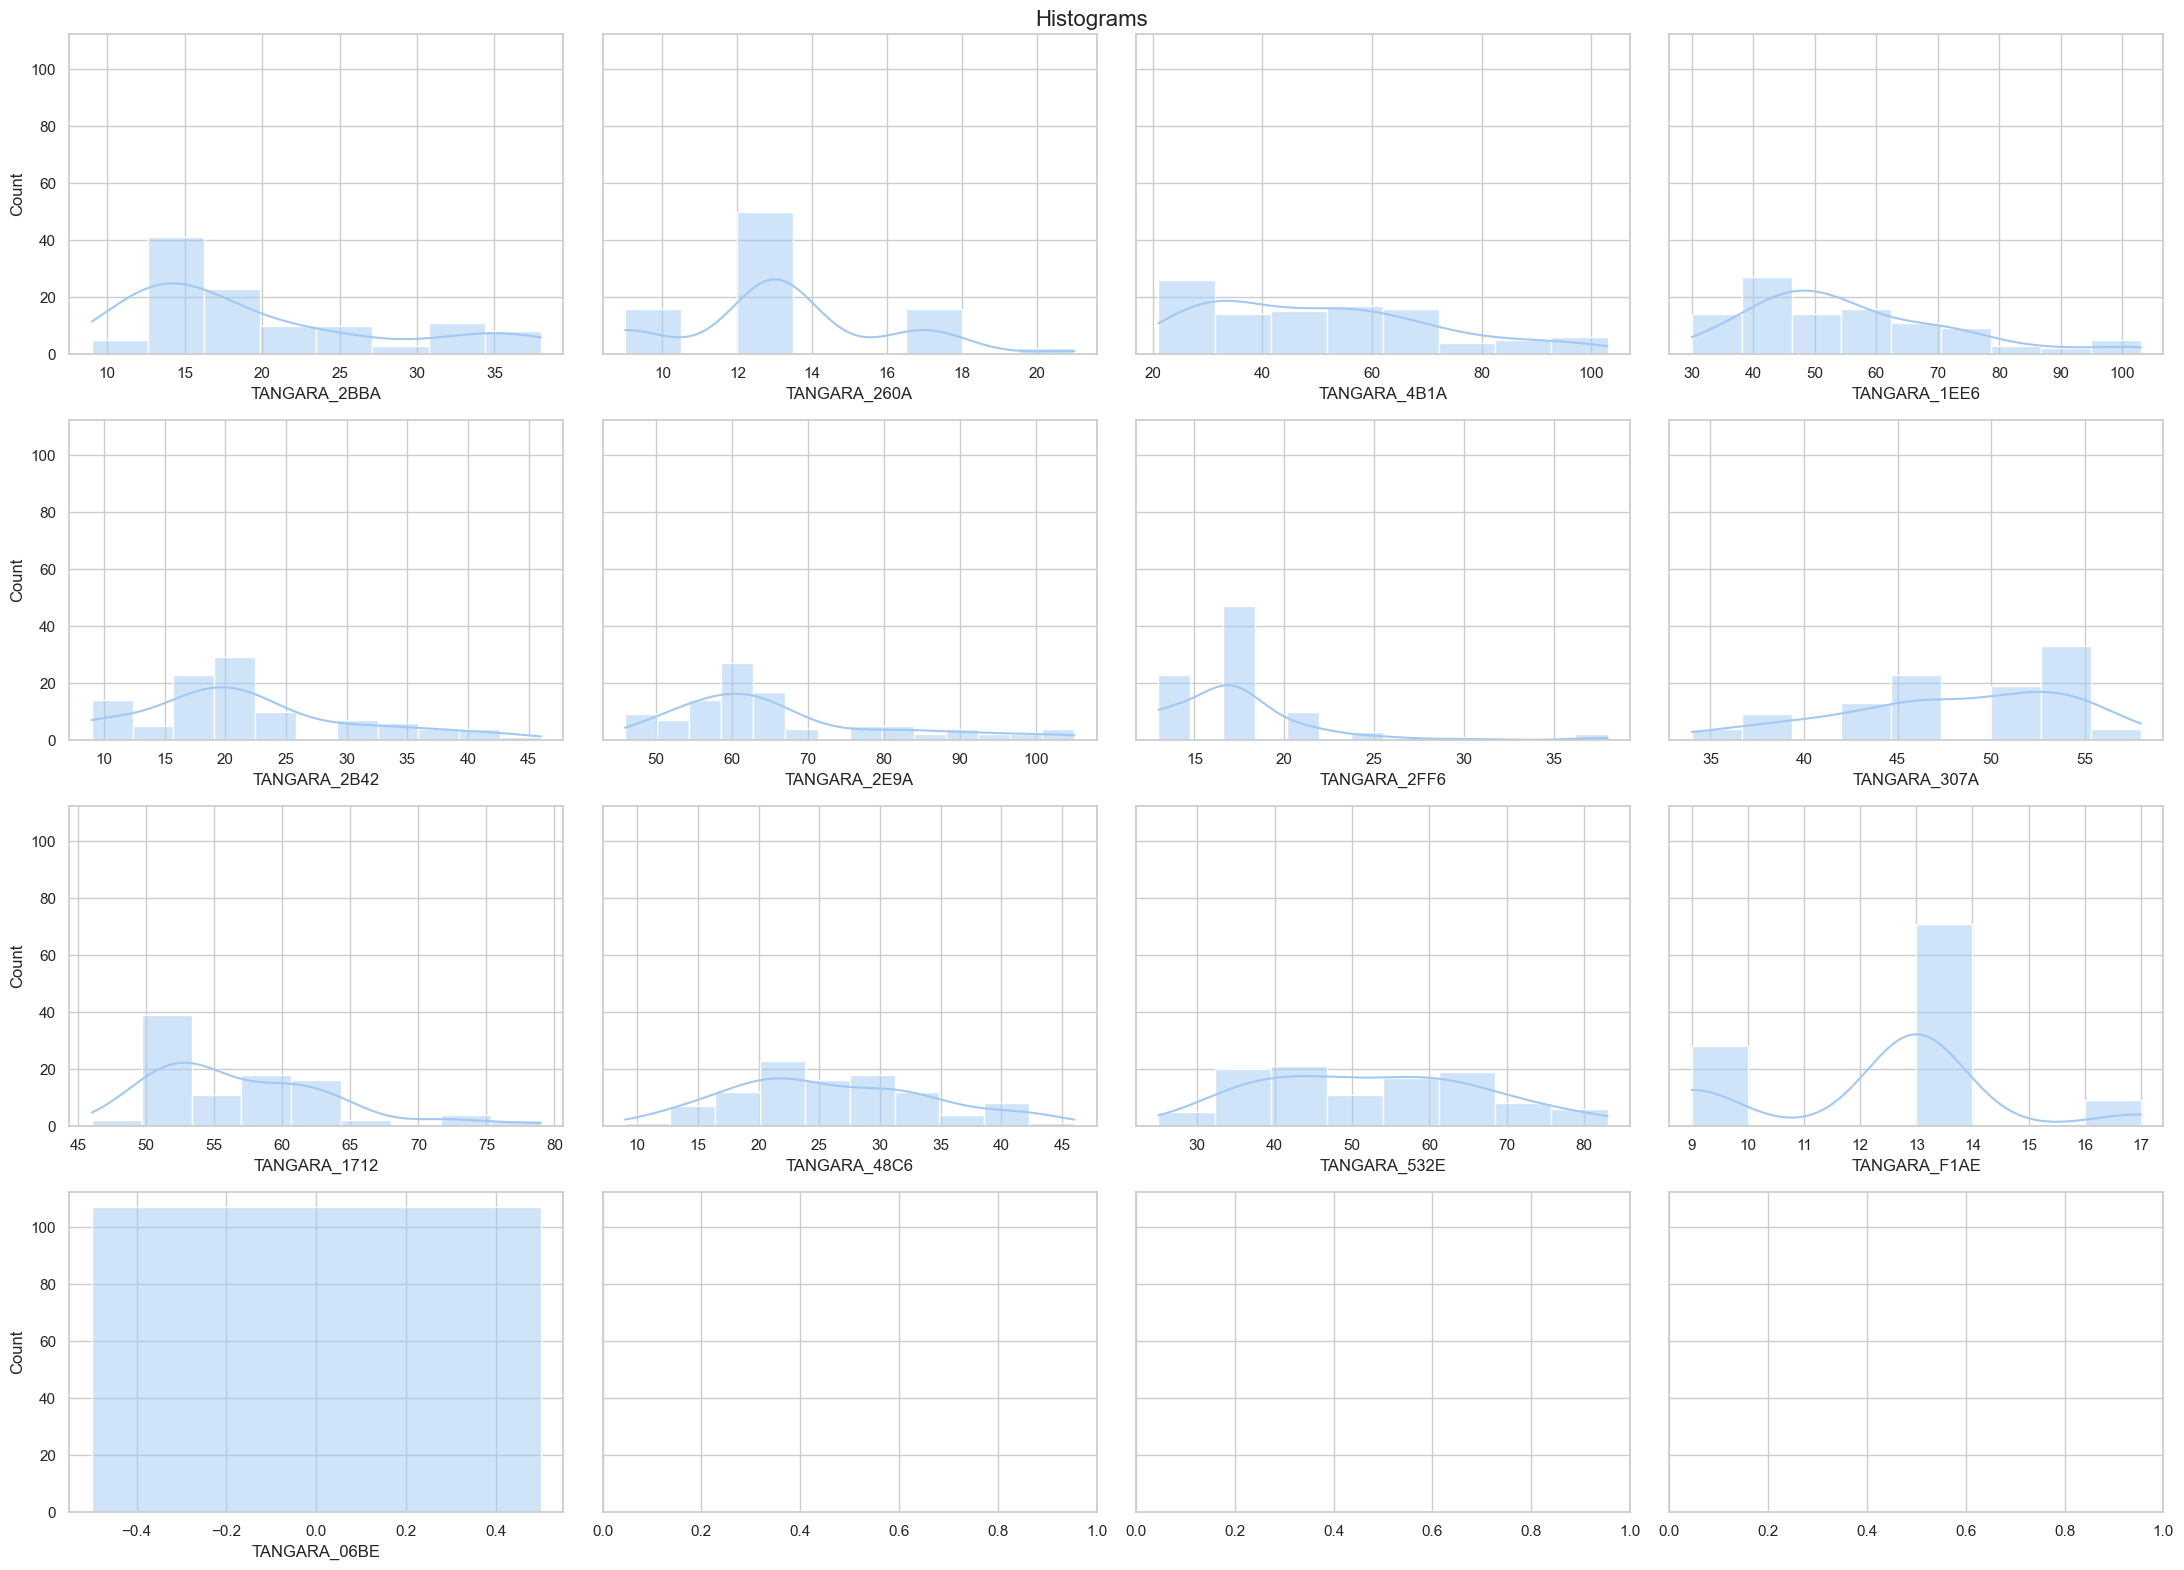

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

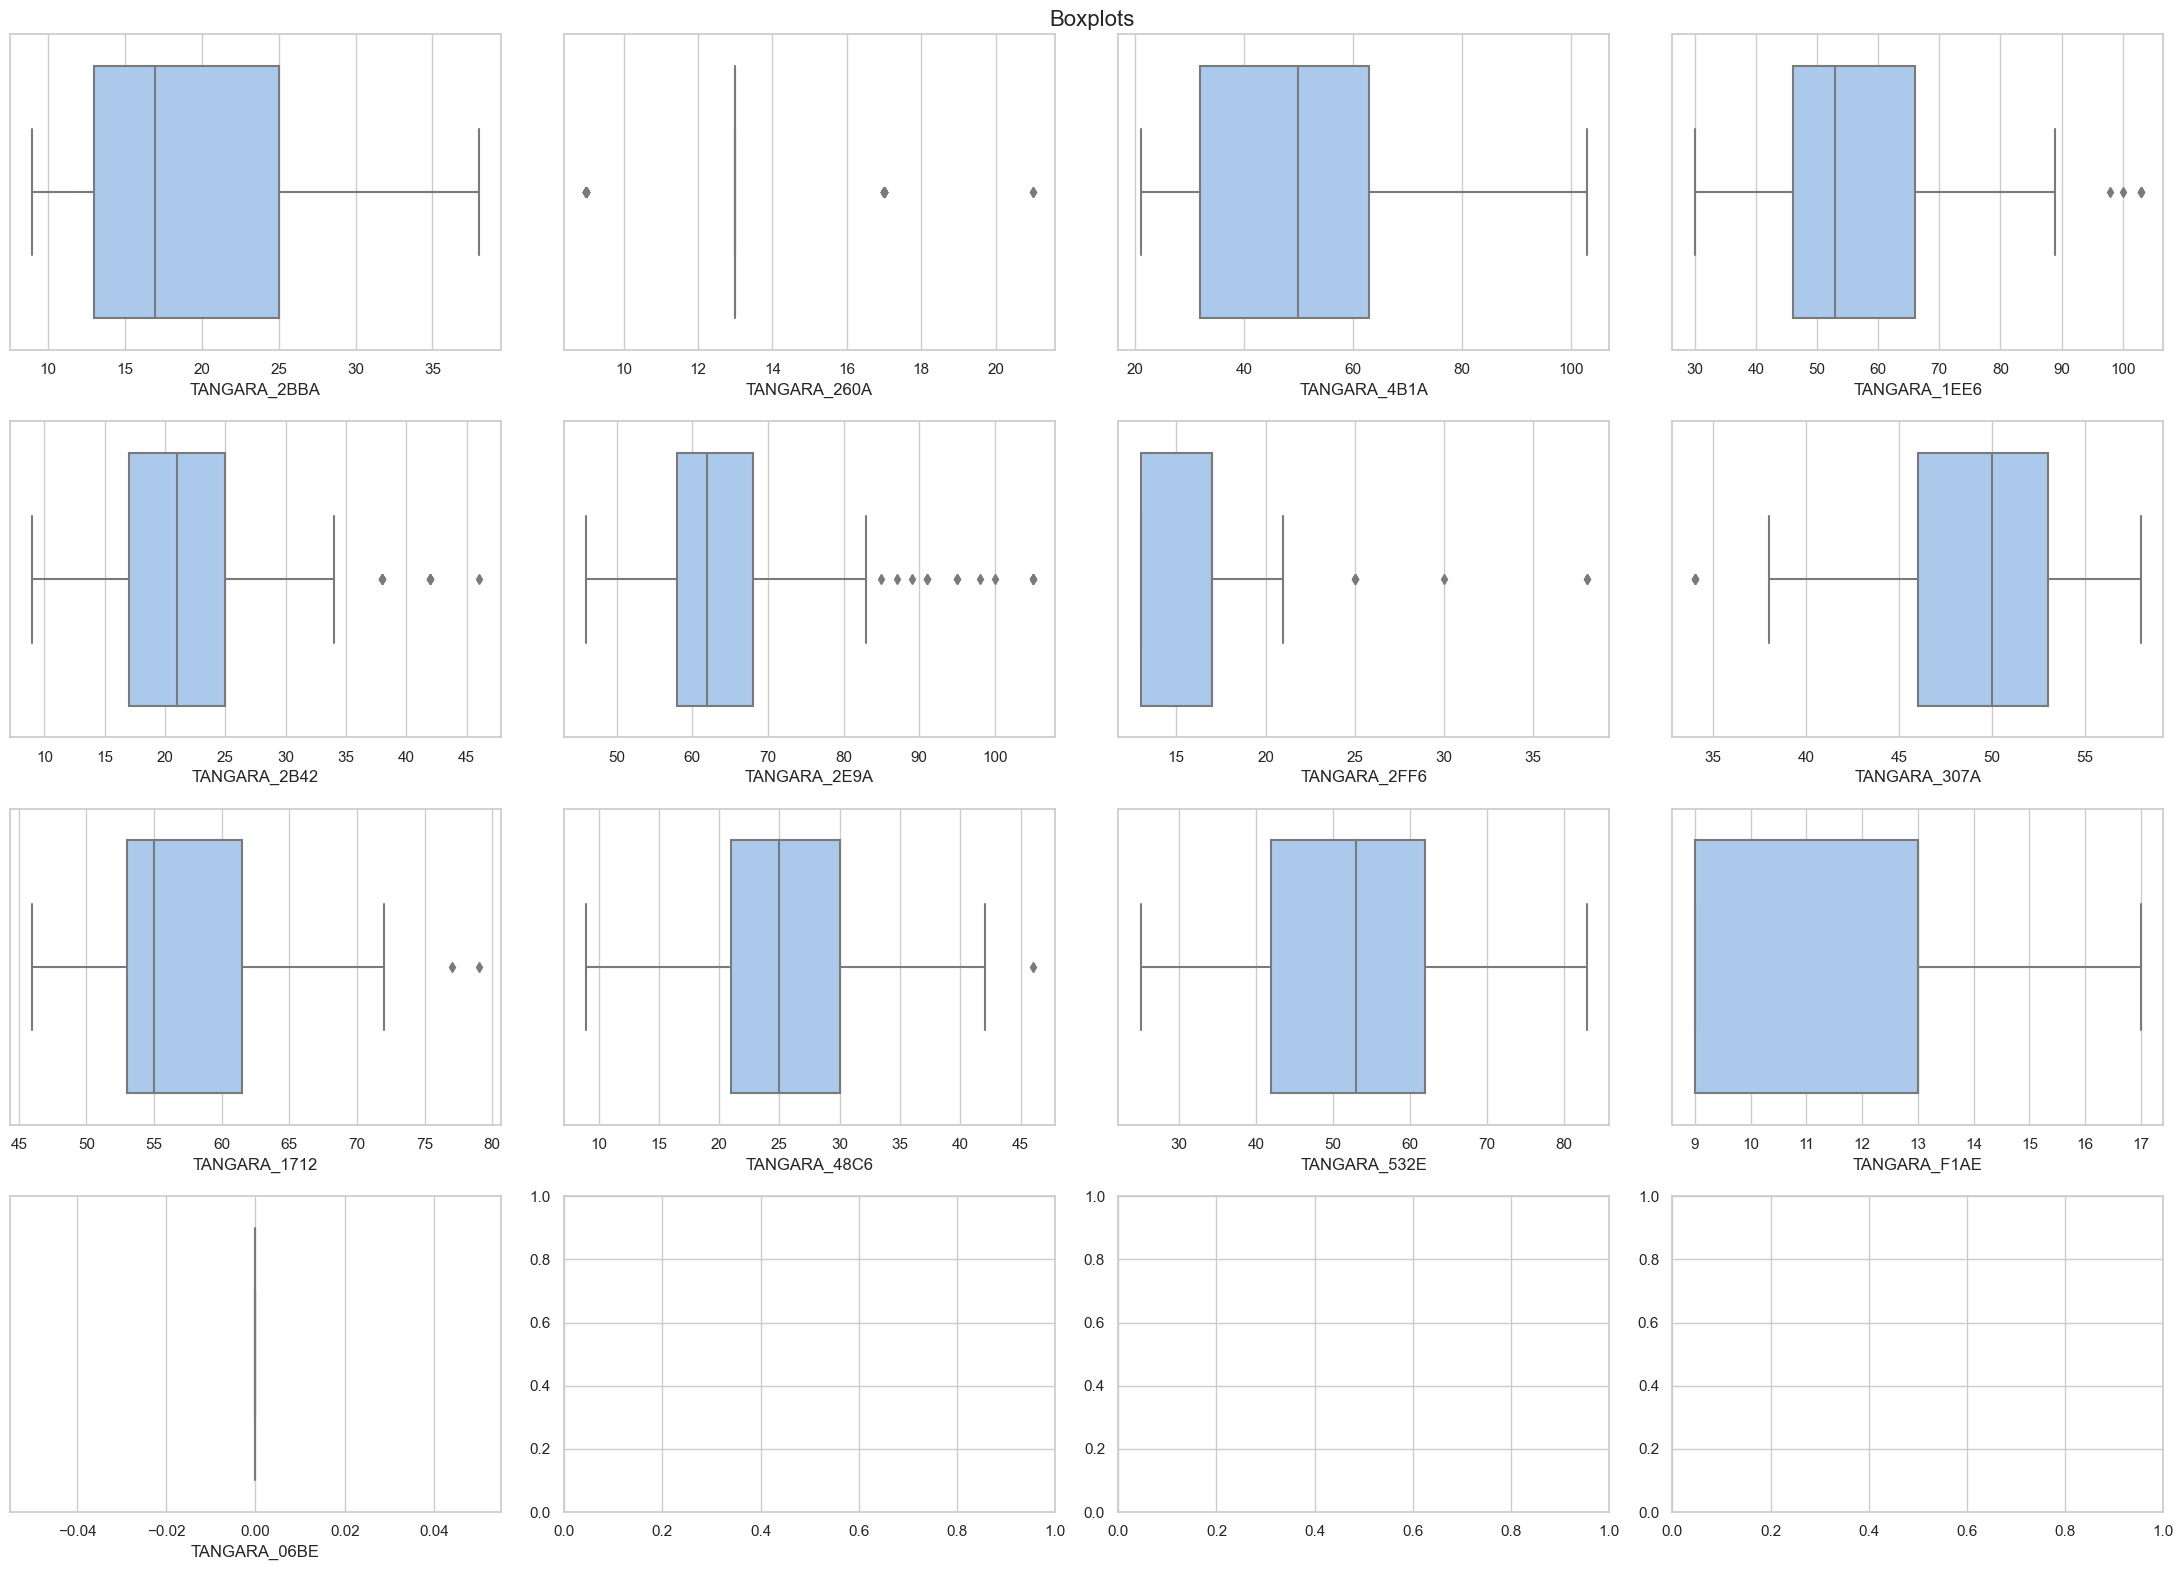

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

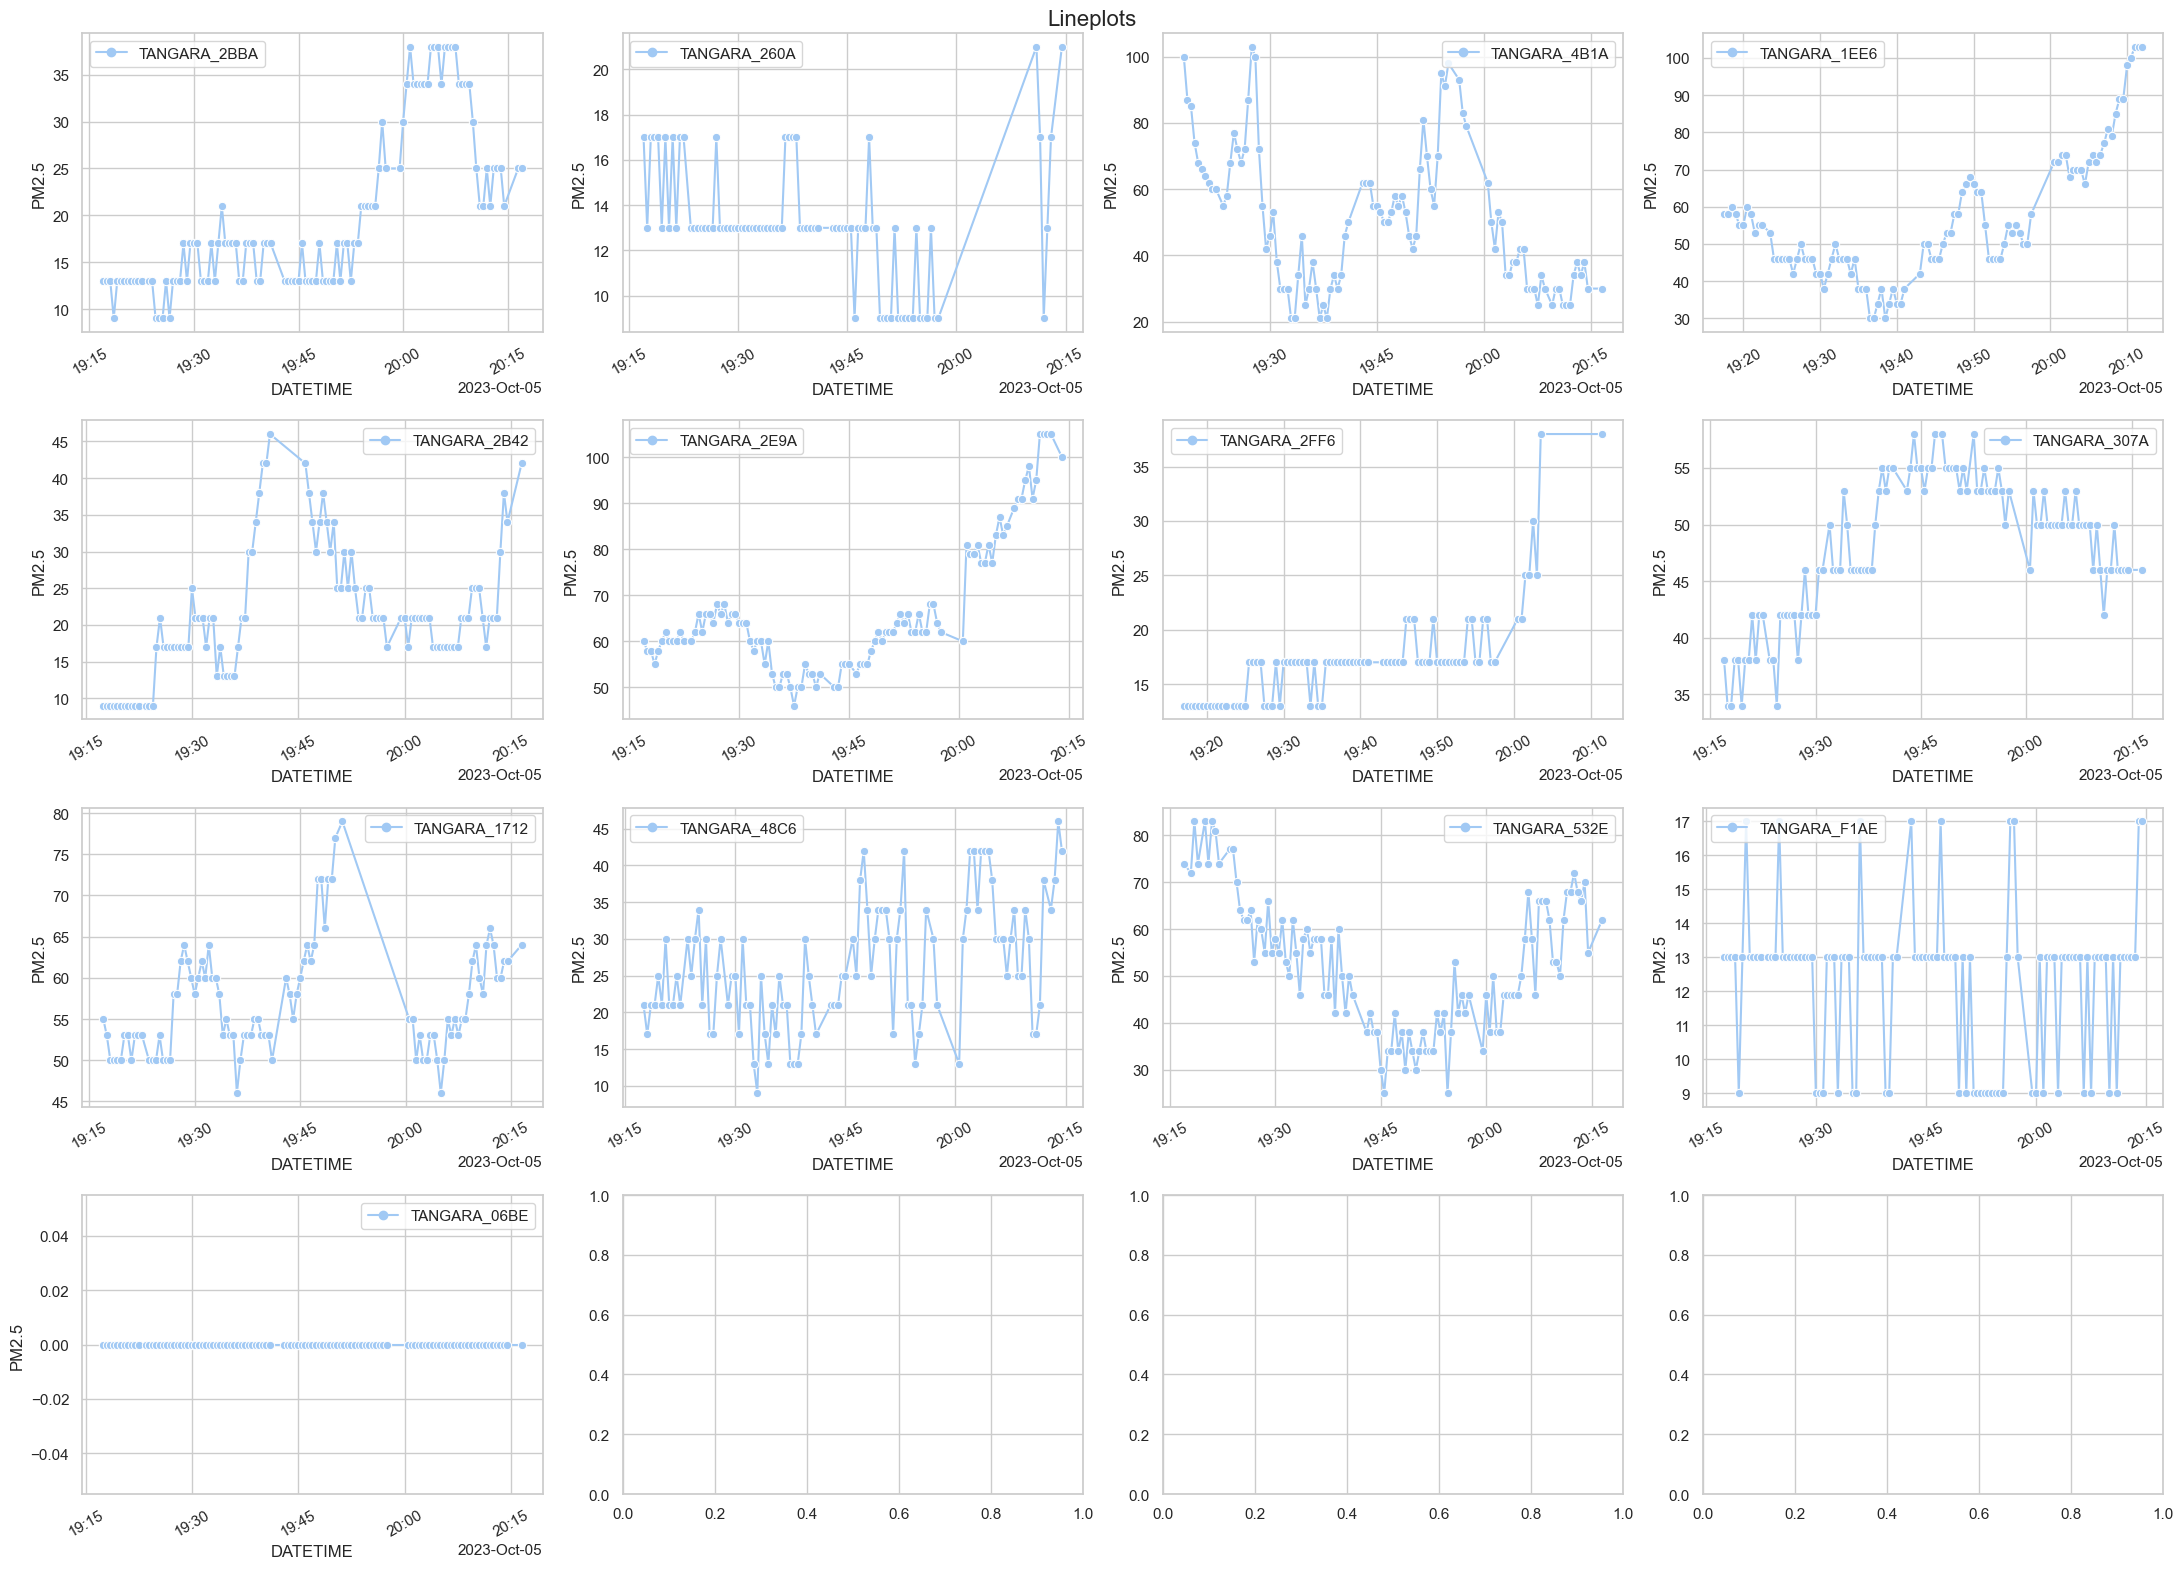

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')